<a href="https://colab.research.google.com/github/axshay007/Webscraping/blob/main/Web_scraping_using_beautifulsoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

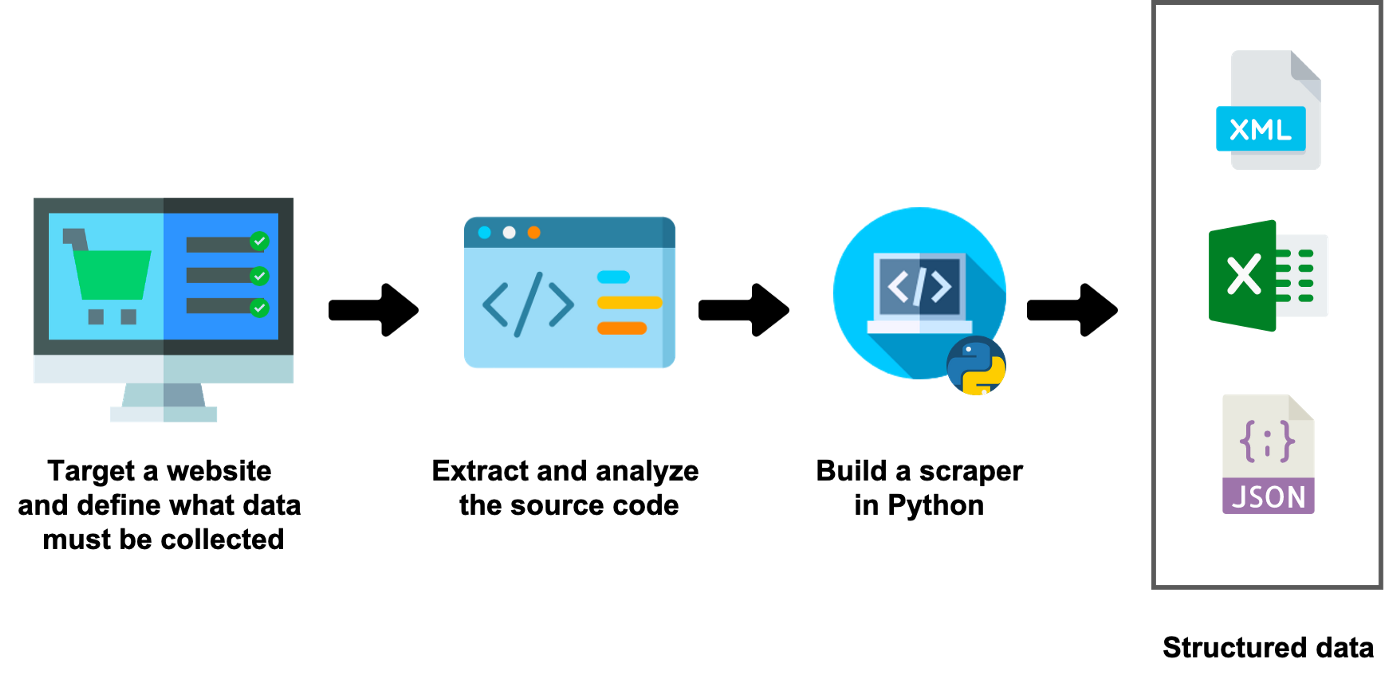

Basic approach

In [1]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.useams.org/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

address_element = soup.find('div', class_='adr')
address = address_element.text.strip()

print(address)

2nd Floor, Manzil Chambers,Mehdipatnam X Roads, HYD500028


Advanced approach

**Performing webscraping on wikipedia to extract FIFA world cup 2022 dataset**

In [ ]:
import requests
import pandas as pd

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
req = requests.get("https://en.wikipedia.org/wiki/2022_FIFA_World_Cup")

In [ ]:
content = req.text

In [ ]:
soup=BeautifulSoup(content, 'html5lib')

**soup.find_all('tag', class_='name')**

In [ ]:
matches = soup.find_all('div', class_='footballbox')


In [ ]:
 #print(matches[1].text) #printing 1st row of datadset


21 November 2022 (2022-11-21)19:00
Senegal 0–2 Netherlands

Report

Gakpo  84'
Klaassen  90+9'
Al Thumama Stadium, DohaAttendance: 41,721Referee: Wilton Sampaio (Brazil)


In [ ]:
home=[]
score=[]
away=[]

**here we write match.find only becoz we are finding only 
 element**

In [ ]:
for match in matches:
   home.append(match.find('th', class_='fhome').get_text())
   score.append(match.find('th', class_='fscore').get_text())
   away.append(match.find('th', class_='faway').get_text())


In [ ]:
dict_football = {'home':home, 'score' : score, 'away': away}
#dict_footballs.append(dict_football)

In [ ]:
#print(dict_football)

In [ ]:
df = pd.DataFrame(dict_football)

In [ ]:
df.head(100)

,home,score,away
0,Qatar,0–2,Ecuador
1,Senegal,0–2,Netherlands
2,Qatar,1–3,Senegal
3,Netherlands,1–1,Ecuador
4,Ecuador,1–2,Senegal
...,...,...,...
59,England,1–2,France
60,Argentina,3–0,Croatia
61,France,2–0,Morocco
62,Croatia,2–1,Morocco


Saving the  scraped dataset to csv file

In [ ]:
df.to_csv('fifa_world_cup_teams.csv', index=False) 